In [25]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

#importing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#Importing different classifier from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('SPY_sentiment')

In [3]:
df

,Date,Mentions,Sentiment,Up
0,2018-08-01,85,0.094719,0
1,2018-08-02,127,0.027789,1
2,2018-08-03,97,0.102551,1
3,2018-08-06,101,0.004156,1
4,2018-08-07,120,0.063874,1
...,...,...,...,...
646,2021-03-01,1524,0.103251,1
647,2021-03-02,1303,0.158467,0
648,2021-03-03,2051,0.123551,0
649,2021-03-04,2285,0.082648,0


In [4]:
#Separate data into comment text (features) and subreddit (target variable)
X = df[['Mentions', 'Sentiment']]
y = df['Up']

#Train test split. Stratify=y guarantees that class balance will be maintained across train and test bloc
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,stratify=y)

In [5]:
#baseline model
y.value_counts(normalize=True)

1    0.545315
0    0.454685
Name: Up, dtype: float64

In [18]:
# Define scoring method
scoring = 'accuracy'
# Model building to train
names = ['Logistic Regression', 'K Nearest Neighbors', 'Gaussian Process', 'Decision Tree', 'Random Forest', 'Neural Net', 'AddaBoost', 'Naive Bayes', 'SVM RBF', 'SVM Sigmoid']
Classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    DecisionTreeClassifier(max_depth = 5),
    RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1 ),
    MLPClassifier(alpha = 1),
    AdaBoostClassifier(),
    GaussianNB(),
    svm.SVC(kernel = 'rbf'),
    svm.SVC(kernel = 'sigmoid')
    
    ]
models = zip(names, Classifiers)
# import KFold
from sklearn.model_selection import KFold, cross_val_score

names = []
result = []
for name, model in models:
    kfold = KFold(n_splits = 2, random_state = 42)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy', verbose = 2)
    result.append(cv_results)
    names.append(name)
    msg = "{0}: {1} ({2})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
Logistic Regression: 0.5450819672131147 (0.02868852459016391)
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
K Nearest Neighbors: 0.485655737704918 (0.006147540983606564)
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
Gaussian Process: 0.4692

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
AddaBoost: 0.5 (0.0)
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
Naive Bayes: 0.5491803278688525 (0.0245901639344262)
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
SVM RBF: 0.48360655737704916 (0.03278688524590165)
[CV]  ................................................................
[CV] ..................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [19]:
#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression
0.5460122699386503
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.55      1.00      0.71        89

    accuracy                           0.55       163
   macro avg       0.27      0.50      0.35       163
weighted avg       0.30      0.55      0.39       163

K Nearest Neighbors
0.49079754601226994
              precision    recall  f1-score   support

           0       0.44      0.43      0.44        74
           1       0.53      0.54      0.54        89

    accuracy                           0.49       163
   macro avg       0.49      0.49      0.49       163
weighted avg       0.49      0.49      0.49       163

Gaussian Process
0.5276073619631901
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        74
           1       0.59      0.45      0.51        89

    accuracy                           0.53       163
   macro avg 

Vader sentiment analysis model (located in SPY_data.py) was optimized by adding in specific key reddit/wsb words with associated scores (from -4.0 to 4.0).

# Model Optimization

In [47]:
pipe = Pipeline([('ss', StandardScaler(with_mean=False)), 
               ('logreg', LogisticRegression())])

In [50]:
grid_values = {'logreg__penalty': ['l1', 'l2', 'elasticnet'],
               'logreg__C': np.logspace(-3,3,7)}

In [52]:
results = {} 

grid = GridSearchCV(pipe, grid_values, cv=2) 
grid.fit(X_train, y_train) 

print('Train Accuracy: ',grid.score(X_train, y_train))
results['train_accuracy'] = grid.score(X_train, y_train) 

print('Test Accuracy: ',grid.score(X_test, y_test))
results['test_accuracy'] = grid.score(X_test, y_test) 

print('BP: ',grid.best_params_)
results['bp'] = grid.best_params_ 

Train Accuracy:  0.5450819672131147
Test Accuracy:  0.5766871165644172
BP:  {'logreg__C': 1.0, 'logreg__penalty': 'l2'}


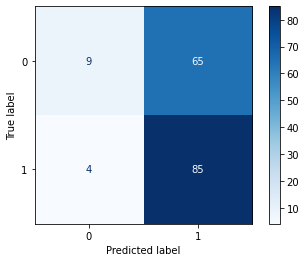

In [69]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(grid.best_estimator_, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.show()

Model is very bullish overall, which is reflective of the current market.

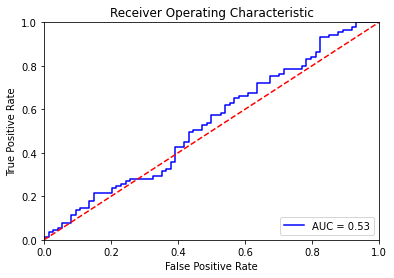

In [58]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [64]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(grid, open(filename, 'wb'))

In [65]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5766871165644172
